In [1]:
import os
import numpy as np
import itertools
from jinja2 import Environment, FileSystemLoader

In [54]:
#!/usr/bin/env python
PATH = os.path.dirname(os.path.abspath("evac_geo_temp.xml"))
TEMPLATE_ENVIRONMENT = Environment(
    autoescape=False,
    loader=FileSystemLoader(PATH),
    trim_blocks=False)

def render_template(template_filename, context):
    return TEMPLATE_ENVIRONMENT.get_template(template_filename).render(context)

def Product(variables):
    return list(itertools.product(*variables))

def create_inifile(geo_name,b):
   
    path = "../../../files/evacuation_files/"
    location = [path + "evac_traj_" + str(2 * bi)[0] + str(2*bi)[-1] + ".txt" for bi in b]
    #number = [10,11,12]
    #outflow = range(1, 4, 2)    
    variables = [b] #[seed, number, outflow]
    product = Product(variables)
    #geo_prod = Product(geo_name)
    for b, in product:
        context= {'b': b}
        b2 = 2*b
        b2str = str(b2)
        fname = "geo_" + b2str[0] + b2str[-1] + ".xml"
        print("output: ", fname)

        with open(fname, 'w') as f:
            xml = render_template('evac_geo_temp.xml', context)
            f.write(xml)
    
    for geo,loc in zip(geo_name,location):
        ini_context = {'geo':geo,'location':loc}
        fname_ini = "ini_" + geo[-6:-4] + ".xml"
        print("output: ", fname_ini)

        with open(fname_ini, 'w') as f:
            xml_ini = render_template('evac_ini_temp.xml', ini_context)
            f.write(xml_ini)
def main():
    b = np.arange(1.0,2.0,0.5)
    geo_name = ["geo_" + str(2 * bi)[0] + str(2*bi)[-1] + ".xml" for bi in b]
    ini_list = ["ini_" + geo[-6:-4] + ".xml" for geo in geo_name]
    location = "evac_traj_" + str(2 * b[-1])[0] + str(2*b[-1])[-1] + ".txt"
    print("jpsvis "+ location)
    print(ini_list)
    create_inifile(geo_name,b)
    for ini in ini_list:
        os.system("pwd")
        os.chdir("../../build/bin")
        os.system("./jpscore ../../files/evacuation_files/" + ini)
        os.chdir("../../files/evacuation_files")
    os.system("jpsvis "+ location)
if __name__ == "__main__":
    main()

jpsvis evac_traj_30.txt
['ini_20.xml', 'ini_30.xml']
output:  geo_20.xml
output:  geo_30.xml
output:  ini_20.xml
output:  ini_30.xml


In [37]:
b = np.arange(0.5,1,0.25)
geo_name = ["geo_" + str(2 * bi)[0] + str(2*bi)[-1] + ".xml" for bi in b] #seed = [1,2,3]


32512

In [9]:
os.system("pwd")
os.chdir("../../build/bin")
os.system("./jpscore ../../files/evacuation_files/evac_ini.xml")
os.chdir("../../files/evacuation_files")
os.system("jpsvis evac_traj.xml")

NameError: name 'os' is not defined

In [14]:
import pandas as pd
from matplotlib import pyplot as plt


In [20]:
 data_y = pd.read_csv('dens2.dat' , sep="\s+", header=0)

In [21]:
print(data_y.head())

   #Frame   dens    vel
0       0  1.412  0.670
1       1  1.388  0.659
2       2  1.375  0.634
3       3  1.397  0.568
4       4  1.419  0.562


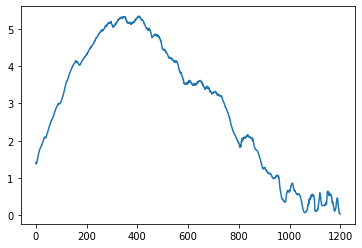

In [22]:
plt.plot(data_y['#Frame'],data_y['dens'])

In [7]:
import numpy as np
b = np.arange(0.6,3.0,0.1)
geo_name = ["geo_" + str(2 * bi)[0] + str(2*bi)[-1] + ".xml" for bi in b]
ini_list = ["ini_" + geo[-6:-4] + ".xml" for geo in geo_name]
print(geo_name)
print(ini_list)
location = "evac_traj_" + str(2 * b[-1])[0] + str(2*b[-1])[-1] + ".txt"
print(location)

['geo_12.xml', 'geo_14.xml', 'geo_19.xml', 'geo_18.xml', 'geo_18.xml', 'geo_27.xml', 'geo_25.xml', 'geo_26.xml', 'geo_28.xml', 'geo_26.xml', 'geo_33.xml', 'geo_35.xml', 'geo_36.xml', 'geo_38.xml', 'geo_39.xml', 'geo_49.xml', 'geo_45.xml', 'geo_46.xml', 'geo_49.xml', 'geo_49.xml', 'geo_59.xml', 'geo_55.xml', 'geo_59.xml', 'geo_59.xml']
['ini_12.xml', 'ini_14.xml', 'ini_19.xml', 'ini_18.xml', 'ini_18.xml', 'ini_27.xml', 'ini_25.xml', 'ini_26.xml', 'ini_28.xml', 'ini_26.xml', 'ini_33.xml', 'ini_35.xml', 'ini_36.xml', 'ini_38.xml', 'ini_39.xml', 'ini_49.xml', 'ini_45.xml', 'ini_46.xml', 'ini_49.xml', 'ini_49.xml', 'ini_59.xml', 'ini_55.xml', 'ini_59.xml', 'ini_59.xml']
evac_traj_59.txt


In [10]:
import random as rand
int(rand.uniform(0,60000))

49872